<a href="https://colab.research.google.com/github/shamrosewebdev/AI_ML_ENGINEER_INTERNSHIP/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
# importing all libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from kagglehub import dataset_load
from kagglehub import KaggleDatasetAdapter

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix,accuracy_score,r2_score,roc_curve,auc

In [83]:
# loading data

df = dataset_load(
    KaggleDatasetAdapter.PANDAS,
    "redwankarimsony/heart-disease-data",
    "heart_disease_uci.csv"
)

df.head()

Using Colab cache for faster access to the 'heart-disease-data' dataset.


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [84]:
# dropping unnecessary columns

df=df.drop(columns=['id','dataset'])

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [85]:
# dataset information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   cp        920 non-null    object 
 3   trestbps  861 non-null    float64
 4   chol      890 non-null    float64
 5   fbs       830 non-null    object 
 6   restecg   918 non-null    object 
 7   thalch    865 non-null    float64
 8   exang     865 non-null    object 
 9   oldpeak   858 non-null    float64
 10  slope     611 non-null    object 
 11  ca        309 non-null    float64
 12  thal      434 non-null    object 
 13  num       920 non-null    int64  
dtypes: float64(5), int64(2), object(7)
memory usage: 100.8+ KB


In [86]:
# Creating a target column

df['target_column']=(df['num']>0).astype(int)

df=df.drop(columns=['num'])

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target_column
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,1
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [87]:
# handling missing values

df.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55
exang,55
oldpeak,62


In [88]:
# Applying imputation to handle the missing values

num_cols = ['trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
cat_cols = ['fbs', 'restecg', 'exang', 'slope', 'thal']

for col in num_cols:
  df[col]=df[col].fillna(df[col].median)

for col in cat_cols:
  df[col]=df[col].fillna(df[col].mode()[0])



/tmp/ipython-input-4065288948.py:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col]=df[col].fillna(df[col].mode()[0])


In [89]:
#data after missing handling values

df.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,0


In [90]:
# Encoding the categorical data

df_encoded=pd.get_dummies(df,drop_first=True)

df_encoded.head()

,age,fbs,exang,target_column,sex_Male,cp_atypical angina,cp_non-anginal,cp_typical angina,trestbps_160.0,trestbps_120.0,...,oldpeak_-0.9,oldpeak_3.7,slope_flat,slope_upsloping,ca_3.0,ca_2.0,ca_1.0,"ca_<bound method Series.median of 0 0.0\n1 3.0\n2 2.0\n3 0.0\n4 0.0\n ... \n915 NaN\n916 NaN\n917 NaN\n918 NaN\n919 NaN\nName: ca, Length: 920, dtype: float64>",thal_normal,thal_reversable defect
0,63,True,False,0,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,67,False,True,1,True,False,False,False,True,False,...,False,False,True,False,True,False,False,False,True,False
2,67,False,True,1,True,False,False,False,False,True,...,False,False,True,False,False,True,False,False,False,True
3,37,False,False,0,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,41,False,False,0,False,True,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False


In [91]:
# SPlitting the data

X=df_encoded.drop('target_column',axis=1)
y=df_encoded['target_column']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [92]:
# training the model

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [93]:
# Prediction

y_pred = model.predict(X_test)
y_prob=model.predict_proba(X_test)[:,1]

In [94]:
# model accuracy

accuracy=accuracy_score(y_test,y_pred)
accuracy

0.7989130434782609

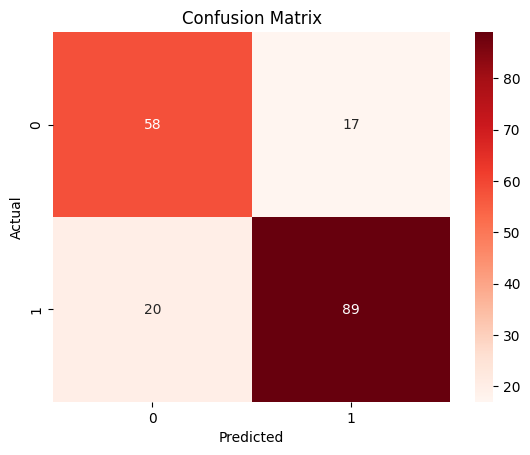

In [95]:
# model confusion metrics

cm=confusion_matrix(y_test,y_pred)

sns.heatmap(cm,annot=True,fmt='d',cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

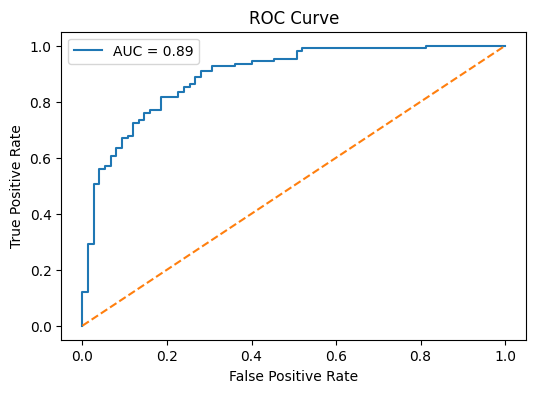

In [100]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

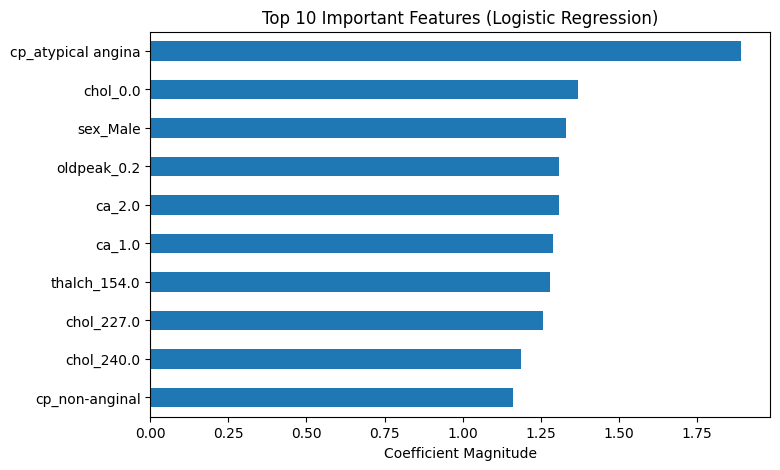

In [102]:
# Features importance

importance = pd.Series(
    model.coef_[0],
    index=X.columns
)

importance_abs = importance.abs()
top_features = importance_abs.sort_values(ascending=False).head(10)
plt.figure(figsize=(8,5))
top_features.sort_values().plot(kind='barh')

# Plot
plt.title("Top 10 Important Features (Logistic Regression)")
plt.xlabel("Coefficient Magnitude")
plt.show()
